# Project - Business Analytics

## Project Description 

We analyze data of the analytical department at Yandex.Afisha. Our task is to help optimize marketing expenses.
For do that we have the following data:
* Server logs with data on Yandex.Afisha visits from June 2017 through May 2018
* Dump file with all orders for the period
* Marketing expenses statistics

We are going to study:
* How people use the product
* When they start to buy
* How much money each customer brings
* When they pay off

**Data Descriptions:**<br>
Link to datasets:
* [visits_log_us.csv](https://code.s3.yandex.net/datasets/visits_log_us.csv) 
* [orders_log_us.csv](https://code.s3.yandex.net/datasets/orders_log_us.csv)
* [costs_us.csv](https://code.s3.yandex.net/datasets/costs_us.csv)

The visits table (server logs with data on website visits):
* Uid — user's unique identifier
* Device — user's device
* Start Ts — session start date and time
* End Ts — session end date and time
* Source Id — identifier of the ad source the user came from
(All dates in this table are in YYYY-MM-DD format.)

The orders table (data on orders):
* Uid — unique identifier of the user making an order
* Buy Ts — order date and time
* Revenue — Yandex.Afisha's revenue from the order

The costs table (data on marketing expenses):
* source_id — ad source identifier
* dt — date
* costs — expenses on this ad source on this day

**Imports packages:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
from operator import attrgetter
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

## 1. Read datasets and prepare the data for the analysis 

**Read datasets and check their general information**

In [2]:
# Functions area:
def check_datset(df_name,df):
    # Check dataset info
    print(df_name,'dataset info:')
    df.info()
    
    # Display dataset first lines
    print('\n'+'Display the head of the', df_name ,'dataset:')
    display(df.head(10))
    
    # Check missing values in the dataset
    check_missing_values(df)
    
    # Check duplicates in the dataset    
    check_duplicates(df_name,df)
    

def check_missing_values(df):
    print('\n'+'Check missing values:\n') 
    report = df.isna().sum().to_frame()
    report = report.rename(columns = {0: 'missing_values'})
    report['% of total'] = (report['missing_values'] / df.shape[0]).round(4)*100
    report.sort_values(by = 'missing_values', ascending = False,inplace =True)
    display(report)
    
    
def check_duplicates(df_name,df):
    if df.duplicated().sum() != 0:
        print("\n"+"The", df_name, "dataframe have duplicated rows.\n")
    else:
        print("\n"+"The", df_name, "dataframe don't have duplicated rows.\n")

**visits dataset examination**

In [3]:
# Read dataset
try:
    visits = pd.read_csv('/datasets/visits_log_us.csv')
except:
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_log_us.csv')

# check visits dataset general information     
check_datset("visits",visits)

visits dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB

Display the head of the visits dataset:


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063



Check missing values:



,missing_values,% of total
Device,0,0.0
End Ts,0,0.0
Source Id,0,0.0
Start Ts,0,0.0
Uid,0,0.0



The visits dataframe don't have duplicated rows.



**orders dataset examination**

In [4]:
# Read dataset 
try:    
    orders = pd.read_csv('/datasets/orders_log_us.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_log_us.csv')

# check orders dataset general information     
check_datset("orders",orders)

orders dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB

Display the head of the orders dataset:


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382



Check missing values:



,missing_values,% of total
Buy Ts,0,0.0
Revenue,0,0.0
Uid,0,0.0



The orders dataframe don't have duplicated rows.



**costs dataset examination**

In [5]:
try:
    costs = pd.read_csv('/datasets/costs_us.csv')
except:
    costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_us.csv')

# check costs dataset general information     
check_datset("costs",costs)

costs dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB

Display the head of the costs dataset:


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24



Check missing values:



,missing_values,% of total
source_id,0,0.0
dt,0,0.0
costs,0,0.0



The costs dataframe don't have duplicated rows.



**Covert and downcast datasets columns data types**

In [6]:
# 1. cast columns name to lowercase
visits = visits.rename(columns=str.lower)
orders = orders.rename(columns=str.lower)
costs = costs.rename(columns=str.lower)

# 2. Convert columns that contain date objects to datetime:
visits['end ts'] = pd.to_datetime(visits['end ts'],format='%Y-%m-%d %H:%M:%S')
visits['start ts'] = pd.to_datetime(visits['start ts'],format='%Y-%m-%d %H:%M:%S')
orders['buy ts'] = pd.to_datetime(orders['buy ts'],format='%Y-%m-%d %H:%M:%S')
costs['dt'] = pd.to_datetime(costs['dt'],format='%Y-%m-%d')

# 3. Add aditional informations in the datasets to group by the dataset by specific attributes:
# visits dataset:
visits['start_date'] = visits['start ts'].dt.date
visits['time_spent'] = (visits['end ts'] - visits['start ts']).dt.seconds
visits['month'] = visits['start ts'].dt.to_period('M')
visits['year'] = visits['start ts'].dt.year
visits['week'] = visits['start ts'].astype('datetime64[W]')
# orders dataset:
orders['month'] = orders['buy ts'].dt.to_period('M')
orders['year'] = orders['buy ts'].dt.year
# costs dataset:
costs['month'] = costs['dt'].dt.to_period('M')
costs['year'] = costs['dt'].dt.month

# 4. Downcast numeric columns(to save bits)
# visits dataset:
visits['source id'] = pd.to_numeric((visits['source id']), downcast ='integer')
visits['time_spent'] = pd.to_numeric((visits['time_spent']), downcast ='integer')
visits['year'] = pd.to_numeric((visits['year']), downcast ='integer')
# orders dataset:
orders['revenue'] = pd.to_numeric((orders['revenue']), downcast ='float')
orders['year'] = pd.to_numeric((orders['year']), downcast ='integer')
# costs dataset:
costs['source_id'] = pd.to_numeric((visits['source id']), downcast ='integer')
costs['costs'] = pd.to_numeric((costs['costs']), downcast ='float')
costs['year'] = pd.to_numeric((costs['year']), downcast ='integer')

# check dataframes infos after casting:
visits.info()
print()
orders.info()
print()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   device      359400 non-null  object        
 1   end ts      359400 non-null  datetime64[ns]
 2   source id   359400 non-null  int8          
 3   start ts    359400 non-null  datetime64[ns]
 4   uid         359400 non-null  uint64        
 5   start_date  359400 non-null  object        
 6   time_spent  359400 non-null  int32         
 7   month       359400 non-null  period[M]     
 8   year        359400 non-null  int16         
 9   week        359400 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int16(1), int32(1), int8(1), object(2), period[M](1), uint64(1)
memory usage: 21.6+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  ---

### Conclusions 

We have read the three datasets: visits, orders and costs.
All the the three datasets don't have missing values or duplicates.
before analyze the data we did the following steps:
1. Rename all the columns to lowercase.
2. Convert the date object to datatime object.
3. Add column of the month and the year of every purchase, payment and user entry(and how much time he spent on the platform).
4. Downcast the numeric columns(integer/float) - to save bits in the memory.

##  2. Make reports and calculate metrics 

### A. Product 

**Check the session for every day, week, and month**

In [56]:
# 1. check the daily average of users entry
daily_trafic = visits.groupby(by='start_date')['uid'].count().reset_index()
print('The daily trafic average is:',int(daily_trafic.mean()))
display(daily_trafic)
fig = px.line(daily_trafic,x="start_date", y="uid",title='user number per day',labels={"start_date":"Date","uid":"user number"},color_discrete_sequence=['red'])
fig.add_hline(y=daily_trafic['uid'].median(),
              annotation_text="Median", 
              annotation_position="top left")
fig.show()

The daily trafic average is: 987


,start_date,uid
0,2017-06-01,664
1,2017-06-02,658
2,2017-06-03,477
3,2017-06-04,510
4,2017-06-05,893
...,...,...
359,2018-05-27,672
360,2018-05-28,1156
361,2018-05-29,1035
362,2018-05-30,1410


The monthly trafic per month is: 29950


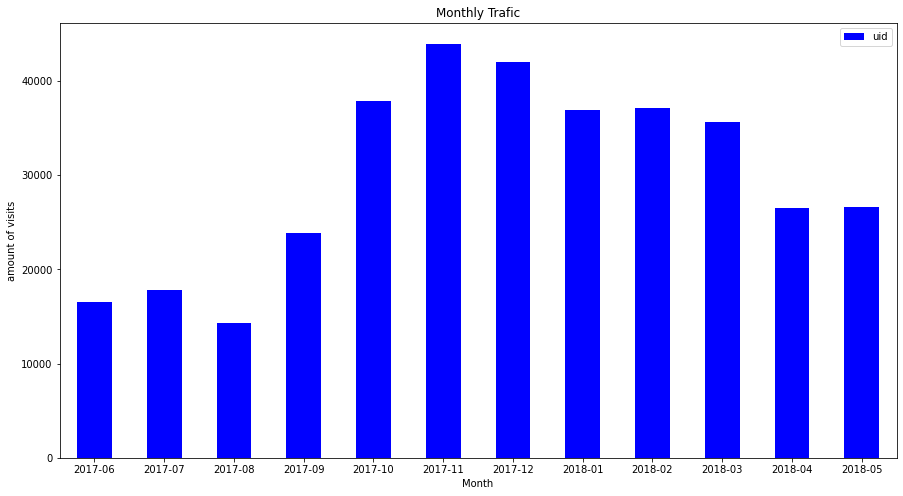

In [8]:
# 2. check the monthly trafic of users entry    
monthly_trafic = visits.groupby(by='month').count()[['uid']]
print('The monthly trafic per month is:',int(monthly_trafic.mean()))
# plot bar plot of the monthly trafic
monthly_trafic.plot.bar(rot=0,figsize=(15,8),title='Monthly Trafic',color='blue')  
plt.ylabel("amount of visits")
plt.xlabel("Month")
plt.show()

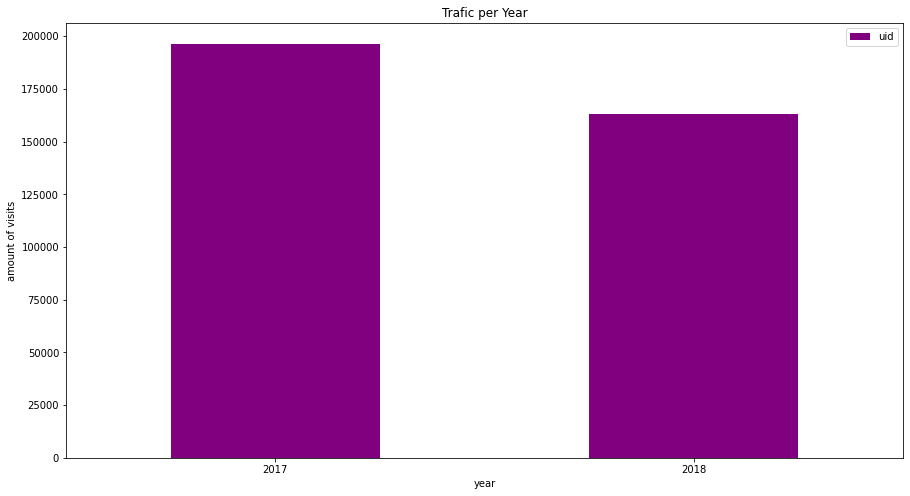

In [9]:
# 2. check the trafic per year of users entry    
year_trafic = visits.groupby(by='year').count()[['uid']]
# plot bar plot of the monthly trafic
year_trafic.plot.bar(rot=0,figsize=(15,8),title='Trafic per Year',color=['purple'])  
plt.ylabel("amount of visits")
plt.xlabel("year")
plt.show()

**Check How many people use every day, week, and month**

In [57]:
dau = visits.groupby(by='start_date')['uid'].nunique().reset_index()
display(dau)
fig = px.line(dau,x="start_date", y="uid",title='DAU',labels={"start_date":"Date","uid":"Unique user number"})
fig.add_hline(y=dau['uid'].median(),
              annotation_text="Median", 
              annotation_position="top left")
fig.show()

,start_date,uid
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820
...,...,...
359,2018-05-27,620
360,2018-05-28,1039
361,2018-05-29,948
362,2018-05-30,1289


In [11]:
wau=orders.groupby(visits['week'])['uid'].nunique().reset_index()

# plot
fig = go.Figure(layout=go.Layout(
        title=go.layout.Title(text="WAU")))
fig.add_trace(go.Scatter(x=wau['week'], 
                        y=wau['uid'],
                    mode='lines+markers',
                    name='lines+markers',line = dict(color='orange', width=3)))
#adding reference line with average DAU over time
fig.show()

,uid
month,
2017-06,13259
2017-07,14183
2017-08,11631
2017-09,18975
2017-10,29692
2017-11,32797
2017-12,31557
2018-01,28716
2018-02,28749


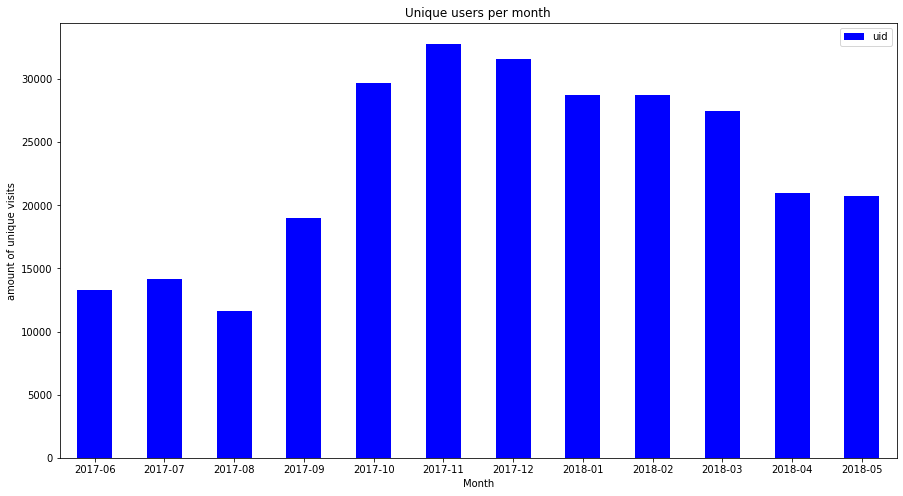

In [12]:
monthly_unique_users = visits.groupby(by='month')[['uid']].nunique()
display(monthly_unique_users)

monthly_unique_users.plot.bar(rot=0,figsize=(15,8),title='Unique users per month',color='blue')  
plt.ylabel("amount of unique visits")
plt.xlabel("Month")
plt.show()

,uid
year,
2017,131777
2018,112535


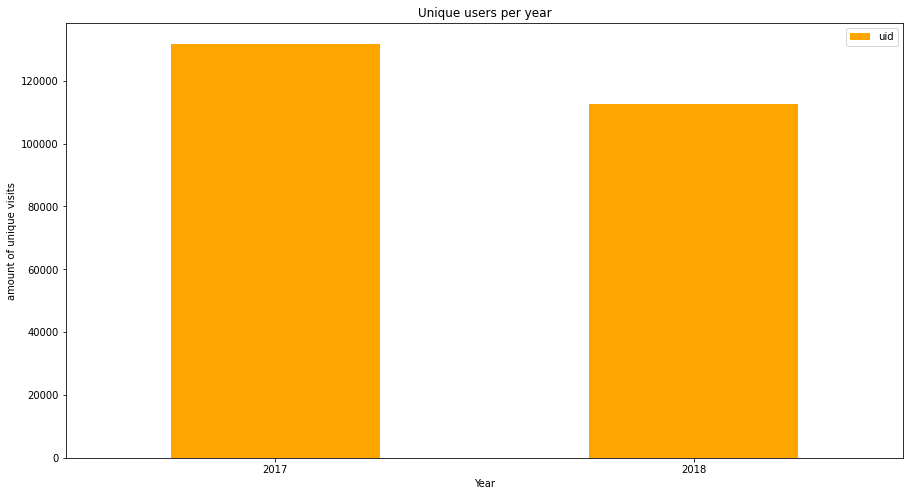

In [13]:
year_unique_users = visits.groupby(by='year')[['uid']].nunique()
display(year_unique_users)

year_unique_users.plot.bar(rot=0,figsize=(15,8),title='Unique users per year',color='orange')  
plt.ylabel("amount of unique visits")
plt.xlabel("Year")
plt.show()

**Check length of each session**

In [14]:
session_duration = visits[['time_spent']]
session_duration['time_spent'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: time_spent, dtype: float64

We see that that most of the length session are around 0 to 840 seconds. lets take the range 0-3600 seconds(0 seconds to one hour) and lets plot the histogram of the session duration

[]

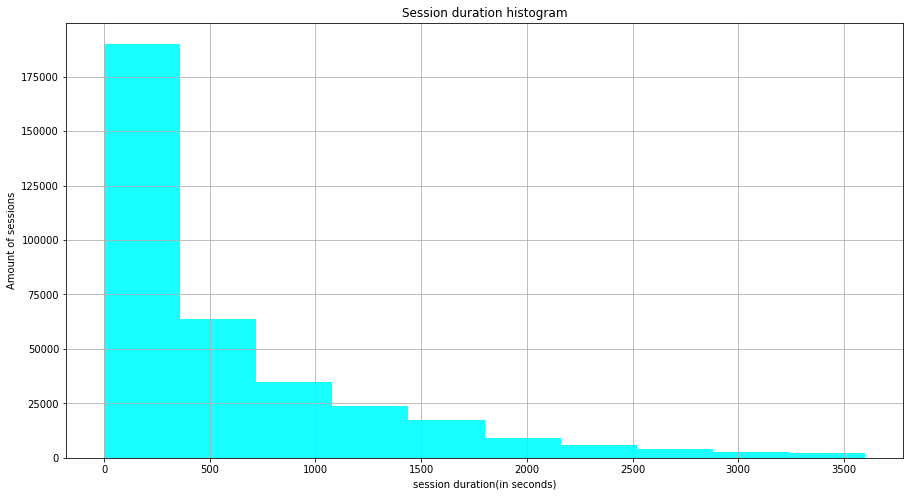

In [15]:
ax1 = session_duration['time_spent'].hist(figsize=(15,8),color='cyan',range=(0,3600),alpha=0.9)
ax1.set_title('Session duration histogram')
ax1.set_xlabel('session duration(in seconds)')
ax1.set_ylabel('Amount of sessions')
ax1.plot()

**How often do users come back**

In [16]:
# 1. find the first session of every user
min_visit=visits.groupby('uid')['start_date'].min().reset_index()
min_visit.columns = ['uid', 'first_session']
display(min_visit)

,uid,first_session
0,11863502262781,2018-03-01
1,49537067089222,2018-02-06
2,297729379853735,2017-06-07
3,313578113262317,2017-09-18
4,325320750514679,2017-09-30
...,...,...
228164,18446403737806311543,2017-11-30
228165,18446424184725333426,2017-12-06
228166,18446556406699109058,2018-01-01
228167,18446621818809592527,2017-12-27


In [17]:
# 2. merge the visits dataset with the the dataset we created before to find the first session
visits=visits.merge(min_visit, how='inner',on='uid')
display(visits.head(10))

,device,end ts,source id,start ts,uid,start_date,time_spent,month,year,week,first_session
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,1080,2017-12,2017,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,1680,2018-02,2018,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,0,2017-07,2017,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,1440,2018-05,2018,2018-05-17,2018-03-09
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,1680,2018-03,2018,2018-03-08,2018-03-09
5,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,0,2017-12,2017,2017-12-21,2017-12-27
6,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03,60,2017-09,2017,2017-08-31,2017-09-03
7,desktop,2017-10-27 16:02:00,3,2017-10-27 15:20:00,16007536194108375387,2017-10-27,2520,2017-10,2017,2017-10-26,2017-09-03
8,desktop,2017-09-04 17:56:00,4,2017-09-04 17:37:00,16007536194108375387,2017-09-04,1140,2017-09,2017,2017-08-31,2017-09-03
9,desktop,2017-10-28 00:04:00,3,2017-10-27 23:56:00,16007536194108375387,2017-10-27,480,2017-10,2017,2017-10-26,2017-09-03


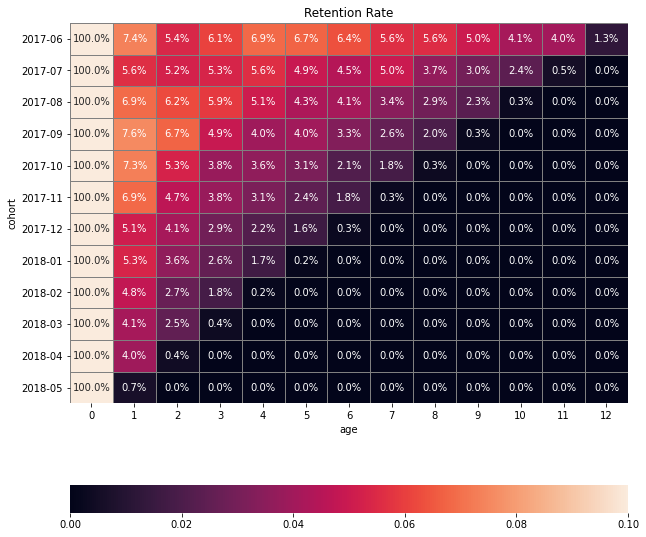

In [18]:
# 3. find cohort and age and then pivot
visits['cohort'] = pd.to_datetime(visits['first_session']).dt.to_period('M')
visits['age'] = ((pd.to_datetime(visits['start_date']) - pd.to_datetime(visits['first_session'])) / np.timedelta64(1,'M')).round().astype('int')
cohorts = visits.pivot_table(index='cohort',
                  columns='age',
                  values='uid',
                  aggfunc='nunique').fillna(0)   

retention=cohorts.iloc[:,0:].div(cohorts[0], axis=0)

# plot heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(retention, annot=True, fmt='.1%', linewidths=1, linecolor='grey',  vmax=0.1, cbar_kws= {'orientation': 'horizontal'} 
            ).set(title = 'Retention Rate')
plt.show()

#### Check the influence of the different devices used by the user

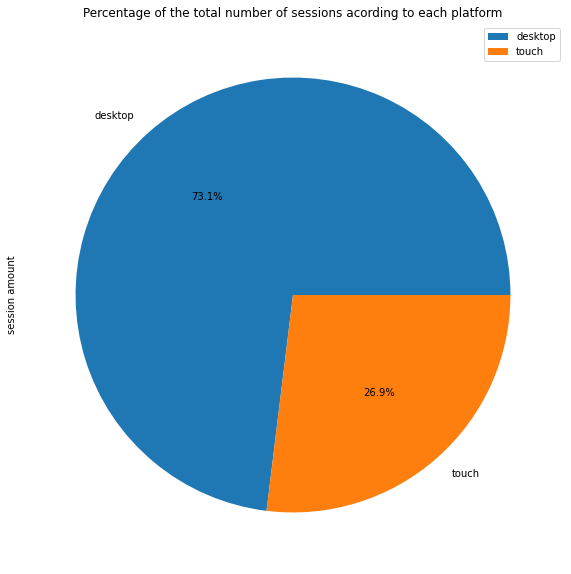

In [19]:
# display pie chart for the amount of session    
devices_sessions  = visits.groupby(by='device')[['uid']].count()
devices_sessions.columns = ['session amount']
ax = devices_sessions.plot.pie(y='session amount',figsize=(10,10),autopct='%1.1f%%')
ax.set_title('Percentage of the total number of sessions acording to each platform')
plt.show()

In [58]:
# check unique entry for mobile devices:
touch_devices = visits[visits['device']=='touch']
dau_touch = touch_devices.groupby(by='start_date')['uid'].nunique().reset_index()
fig = px.line(dau_touch,x="start_date", y="uid",title='DAU - Touch devices'
              ,labels={"start_date":"Date","uid":"Unique user number"})
fig.add_hline(y=dau_touch['uid'].median(),
              annotation_text="Median", 
              annotation_position="top left")
fig.show()

In [60]:
# check unique entry for desktop devices:
desktop_devices = visits[visits['device']=='desktop']
dau_desktop = desktop_devices.groupby(by='start_date')['uid'].nunique().reset_index()
fig = px.line(dau_desktop,x="start_date", y="uid",title='DAU - Desktop devices'
              ,labels={"start_date":"Date","uid":"Unique user number"})
fig.add_hline(y=dau_touch['uid'].median(),
              annotation_text="Median", 
              annotation_position="bottom right")
fig.show()

Check session duration according to the kind of device

In [22]:
# check the distribution of session length on touch devices
touch_session_duration = touch_devices[['time_spent']]
touch_session_duration['time_spent'].describe()

count    96833.000000
mean       479.619407
std        752.531533
min          0.000000
25%         60.000000
50%        180.000000
75%        600.000000
max      30840.000000
Name: time_spent, dtype: float64

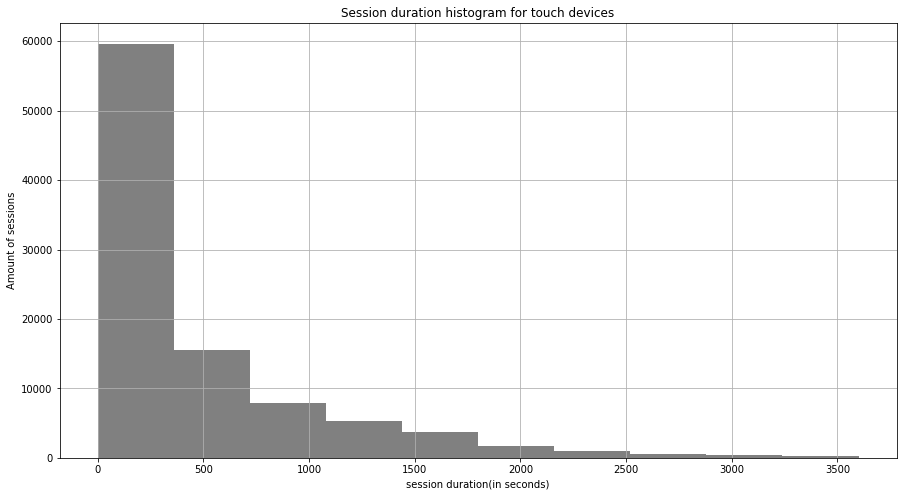

In [23]:
ax3 = touch_session_duration['time_spent'].hist(figsize=(15,8),color='gray',range=(0,3600),alpha=1)
ax3.set_title('Session duration histogram for touch devices')
ax3.set_xlabel('session duration(in seconds)')
ax3.set_ylabel('Amount of sessions')
plt.show()

In [24]:
# check the distribution of session length on touch devices
desktop_session_duration = desktop_devices[['time_spent']]
desktop_session_duration['time_spent'].describe()

count    262567.000000
mean        703.946977
std        1091.545596
min           0.000000
25%         120.000000
50%         360.000000
75%         900.000000
max       84480.000000
Name: time_spent, dtype: float64

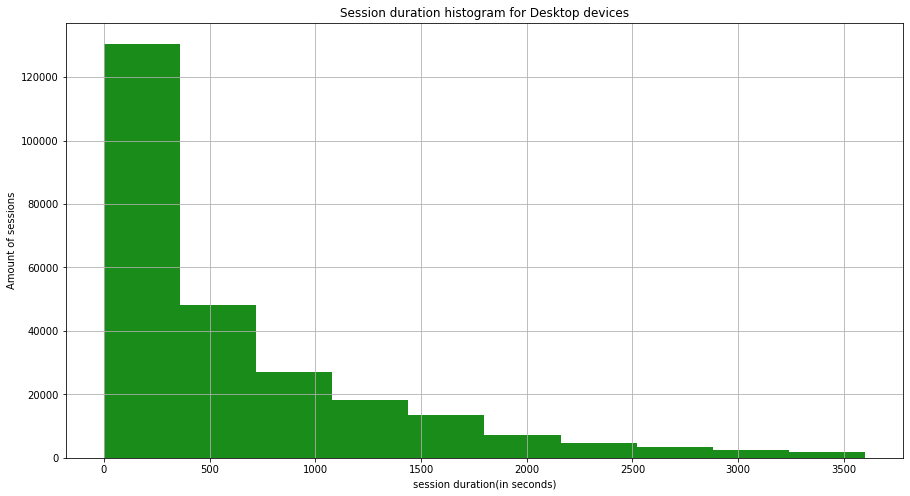

In [25]:
ax4 = desktop_session_duration['time_spent'].hist(figsize=(15,8),color='green',range=(0,3600),alpha=0.9)
ax4.set_title('Session duration histogram for Desktop devices')
ax4.set_xlabel('session duration(in seconds)')
ax4.set_ylabel('Amount of sessions')
plt.show()

#### Conclusions - Product 

**From the plots and analytics that we made we got the following conclusions:**
* The average daily trafic is 987(The average visits per day)
* From the WAU we can see a big incrase on the visits between 3 august to 23 November. afrter the last month of nevember the amount of visits per week decreased. 
* In the winter months of 2017 the system had the most visits(October to January). when from june to november the number of visits per month increase(In november the company had more than 41k of visits). But after november the number of visitors decreased for each month.
* The second half of 2017 and the first half of 2018 had almost the same number even that 2017 had more visits this year include June so in the first half of 2018 we supose that in the end the first half of 2018 will have more visits the second half of 2017.
* The number of unique users per month on august 2017 was the smallest but after that the number of users using the platform increased significantly every month until november 2017(which was the month with the most users). after november the number decreased  until April 2018 and in May the number of users remain stable.
* Similar the distribution of the number of visits per year also the number of the unique users in the second half of 2017 was similar in the unique users in the first half of 2018. 
* The percentage of the users that come back to use the system after the first try is not big but the users that comeback but the most of the users that did come back - mostly did that after few month(1-4 months) 
* Most of the visits was done by desktop devices - 73.1% of the visits, which the other visits(26.9%) was done with touch devices.
* The distribution of the number of visits in the different devices over time was similar to the general distribution(of number of visits over time). the only difference we see that the change rate of the touch devices is less stable than the change rate of desktop devices(the std of the touch devices is almost equal to the std of the desktop devices but his mean is almost half of it).
* The general session time of vistors is between 0-1000 seconds. when the mean session in the touch device is almost half of the mean session in the desktop devices. 

### B. Sales

Revenue per month

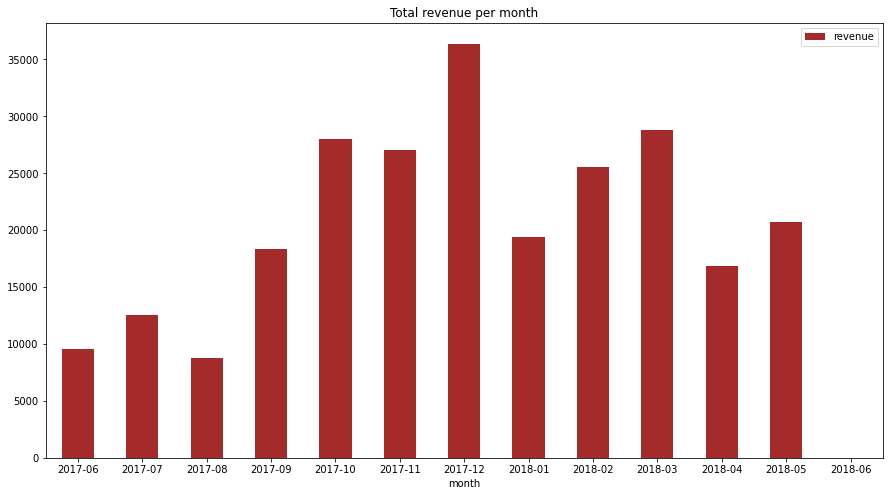

In [26]:
# group by month
month_revenue = orders.groupby(['month'])['revenue'].sum().reset_index()

# plot
month_revenue.set_index('month',drop =True,inplace=True)
month_revenue.plot.bar(rot=0,figsize=(15,8),title='Total revenue per month',color='brown')

plt.show()

**Lets check when do people start buying (In KPI analysis, we're usually interested in knowing the time that elapses between registration and conversion — when the user becomes a customer. For example, if registration and the first purchase occur on the same day, the user might fall into category Conversion 0d. If the first purchase happens the next day, it will be Conversion 1d.)**

In [27]:
# 1. find out the time of first order for each user.
first_order = orders.groupby('uid')['buy ts'].min().reset_index()
first_order.columns = ['uid', 'first_order_date']
display(first_order.head(5))

#2. merge first_order and min_visit to the orders table 
orders = orders.merge(first_order, how='left',on='uid')
orders = orders.merge(min_visit, how='left',on='uid')
orders['conversion']=((pd.to_datetime(orders['first_order_date'])-pd.to_datetime(orders['first_session']))/np.timedelta64(1,'D')).astype('int')

display(orders)

,uid,first_order_date
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


,buy ts,revenue,uid,month,year,first_order_date,first_session,conversion
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06,2017,2017-06-01 00:10:00,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06,2017,2017-06-01 00:25:00,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06,2017,2017-06-01 00:27:00,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06,2017,2017-06-01 00:29:00,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06,2017,2017-06-01 07:58:00,2017-06-01,0
...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05,2018,2018-05-31 23:50:00,2018-05-31,0
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05,2018,2018-05-31 23:50:00,2018-05-31,0
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05,2018,2018-05-31 23:54:00,2018-05-31,0
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05,2018,2018-05-31 23:56:00,2017-10-23,220


In [28]:
# 3. display the histogram of the conversation
fig = px.histogram(orders, x="conversion",nbins=15,color_discrete_sequence=['green'],
                   labels={'conversion':'Converstaion rate'}, title="Conversation Histogram")
fig.show()

**Check how many orders the users will make during a given period of time**

In [29]:
# 1. Add the month of the first order as a column
orders['first_order_month'] = orders['first_order_date'].dt.to_period('M')
# 2. check when the first purchase of any user and save it in different df.
cohort_by_month = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_by_month.columns=['first_order_month','cohort_size']
cohort_by_month.head()

,first_order_month,cohort_size
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340


In [30]:
#calculating number of purchases for cohort and month
cohort=orders.groupby(['first_order_month','month'])['revenue'].count().reset_index()
cohort.columns=['first_order_month','month','orders']
# merge cohort with cohort size
cohort=cohort.merge(cohort_by_month,on=['first_order_month'])
cohort['age_month'] = (cohort['month'] - cohort['first_order_month']).apply(attrgetter('n'))
cohort['orders_per_buyer']= cohort['orders']/cohort['cohort_size']
display(cohort)

,first_order_month,month,orders,cohort_size,age_month,orders_per_buyer
0,2017-06,2017-06,2354,2023,0,1.163618
1,2017-06,2017-07,177,2023,1,0.087494
2,2017-06,2017-08,174,2023,2,0.086011
3,2017-06,2017-09,226,2023,3,0.111715
4,2017-06,2017-10,292,2023,4,0.144340
...,...,...,...,...,...,...
74,2018-03,2018-05,176,3533,2,0.049816
75,2018-04,2018-04,2495,2276,0,1.096221
76,2018-04,2018-05,195,2276,1,0.085677
77,2018-05,2018-05,3249,2988,0,1.087349


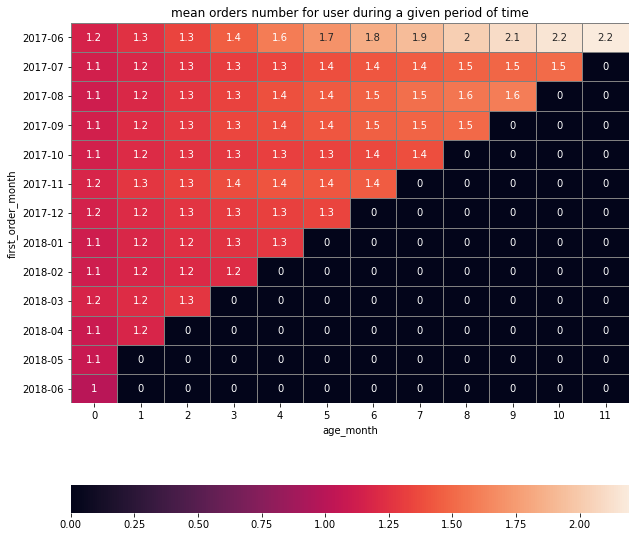

In [31]:
cohort_piv=cohort.pivot_table(
    index='first_order_month', 
    columns='age_month', 
    values='orders_per_buyer', 
    aggfunc='sum'
).cumsum(axis=1)

cohort_piv = cohort_piv.fillna(0)

# display a heat map:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(cohort_piv ,annot=True, linewidths=1, linecolor='gray', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title = 'mean orders number for user during a given period of time')
plt.show()

**Check what is the average purchase size**

In [32]:
revenue_per_user = orders.groupby(['uid'])['revenue'].sum().reset_index()
# check the distribution before ploting the histogram
revenue_per_user['revenue'].describe()

count    36523.000000
mean         6.901328
std         88.128532
min          0.000000
25%          1.470000
50%          3.050000
75%          5.800000
max      11810.179688
Name: revenue, dtype: float64

In [33]:
# lets check the percentage of the users that the company had between 0 to 100 dolars of revenue.
percentage = (len(revenue_per_user[revenue_per_user['revenue']<=100])/len(revenue_per_user))
print('percentage of the users their total orders cost was between 0 to 100 dolars is: {:.2%}'.format(percentage))

percentage of the users their total orders cost was between 0 to 100 dolars is: 99.60%


because the percentage of the revenues that between 0 to 100 from the the total revenues is so high lets plot between the range of 0 to 100 to understand better the data distribution. 

In [34]:
fig = px.histogram(revenue_per_user, x="revenue",color_discrete_sequence=['purple'],range_x=[0,100], title="revenue per user")
fig.show()

In [35]:
revenue_per_cohort=orders.groupby(['first_order_month','month'])['revenue'].mean().reset_index()
revenue_per_cohort['age_month'] = (revenue_per_cohort['month'] - revenue_per_cohort['first_order_month']).apply(attrgetter('n'))
display(revenue_per_cohort.head(12))

,first_order_month,month,revenue,age_month
0,2017-06,2017-06,4.060106,0
1,2017-06,2017-07,5.547006,1
2,2017-06,2017-08,5.088161,2
3,2017-06,2017-09,8.545575,3
4,2017-06,2017-10,7.084178,4
5,2017-06,2017-11,6.825321,5
6,2017-06,2017-12,6.966449,6
7,2017-06,2018-01,6.761839,7
8,2017-06,2018-02,5.279009,8
9,2017-06,2018-03,8.009870,9


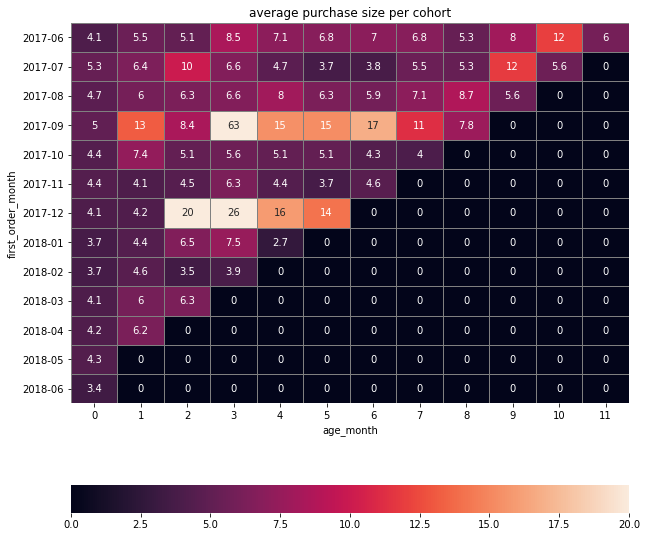

In [36]:
# pivot to find the mean and plot
avg_cohort_piv=revenue_per_cohort.pivot_table(index='first_order_month', 
    columns='age_month', 
    values='revenue', 
    aggfunc='mean'
)
# plot
fig, ax = plt.subplots(figsize=(10,10))
avg_cohort_piv = avg_cohort_piv.round(1).fillna(0)
sns.heatmap(avg_cohort_piv, vmax=20,annot=True, linewidths=1, linecolor='gray', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title = 'average purchase size per cohort')
plt.show()

**Calculate LTV - how much money the company will earn from the revenues**

In [37]:
# Calculate the revenue per cohort in each month
ltv_cohort=orders.groupby(['first_order_month','month'])['revenue'].sum().reset_index()
display(ltv_cohort)
ltv_cohort.columns = ['first_order_month','end_month','cohort_revenue']
# Merge and calculate ltv 
ltv_cohort=ltv_cohort.merge(cohort_by_month,on=['first_order_month'])
ltv_cohort['age']=(ltv_cohort['end_month'] - ltv_cohort['first_order_month']).apply(attrgetter('n'))
ltv_cohort['ltv']=ltv_cohort['cohort_revenue']/ltv_cohort['cohort_size']
display(ltv_cohort.head(15))

,first_order_month,month,revenue
0,2017-06,2017-06,9557.490234
1,2017-06,2017-07,981.820007
2,2017-06,2017-08,885.340027
3,2017-06,2017-09,1931.300049
4,2017-06,2017-10,2068.580078
...,...,...,...
74,2018-03,2018-05,1114.869995
75,2018-04,2018-04,10600.690430
76,2018-04,2018-05,1209.920044
77,2018-05,2018-05,13925.759766


,first_order_month,end_month,cohort_revenue,cohort_size,age,ltv
0,2017-06,2017-06,9557.490234,2023,0,4.724414
1,2017-06,2017-07,981.820007,2023,1,0.485329
2,2017-06,2017-08,885.340027,2023,2,0.437637
3,2017-06,2017-09,1931.300049,2023,3,0.954671
4,2017-06,2017-10,2068.580078,2023,4,1.022531
5,2017-06,2017-11,1487.920044,2023,5,0.735502
6,2017-06,2017-12,1922.739990,2023,6,0.950440
7,2017-06,2018-01,1176.560059,2023,7,0.581592
8,2017-06,2018-02,1119.150024,2023,8,0.553213
9,2017-06,2018-03,1225.510010,2023,9,0.605788


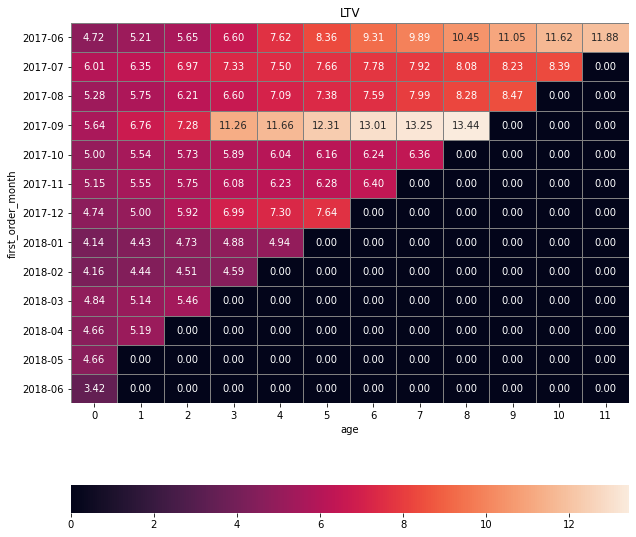

In [38]:
# pivot and display hit map
ltv_cohort_piv=ltv_cohort.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='sum'
).cumsum(axis=1)
ltv_cohort_piv = ltv_cohort_piv.fillna(0)

# plot
fig, ax = plt.subplots(figsize=(10,10))
ltv_cohort_piv.index=ltv_cohort_piv.index.astype(str)
sns.heatmap(ltv_cohort_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='LTV')
plt.show()

#### Conclusions - Sales 

After the ploting we get the following conclusions:
* Most of the times that users order again in the platform was really close to the date of their first order in the platform which mean that - the vistors order again after a short time or they are not come back to purchase at all.
* The mean number of orders per cohort dosent change much over the time. and the average number of purchase per user is low - less than 2 orders. so most of the users don't do a second order after the first one.
* The average purchase size per cohort in some cases is bigger when the cohort include the months of the new year. but theres no any specific consistency we can rely on.
* The LTV rate is low most of the time. the bigger LTV values are among the cohort the started in September 2017 and that include November 2017. 

### C. Marketing 

**Check how much money was spent (Overall/per source/over time)**

Total marketing costs

In [39]:
# Calculate the total marketing costs
costs = costs.sort_values(by=['dt','source_id'])
print('The Total marketing cost is ',costs['costs'].sum())

The Total marketing cost is  329131.62


cost per month compare revenue

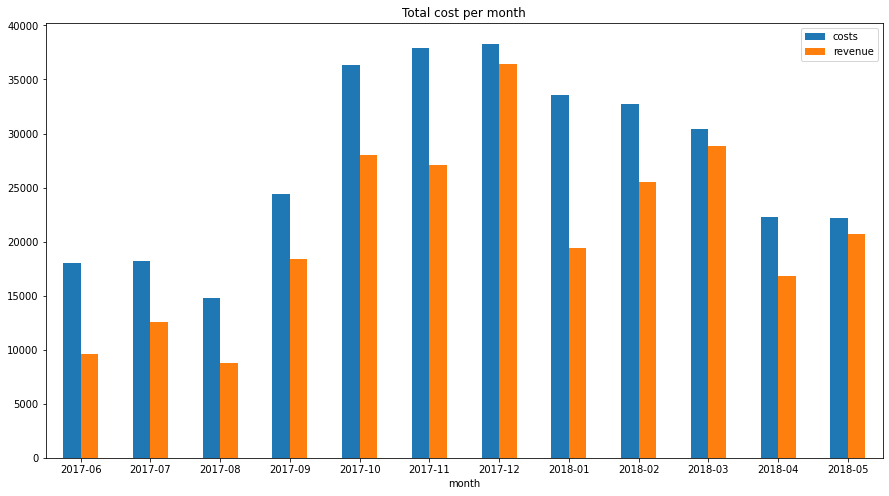

In [40]:
# group by month
month_cost = costs.groupby(['month'])['costs'].sum().reset_index()

# plot
month_cost.set_index('month',drop =True,inplace=True)
month_cost['revenue'] = month_revenue['revenue']
month_cost.plot.bar(rot=0,figsize=(15,8),title='Total cost per month')
plt.show()

Total cost per source id

,source_id,costs
0,1,28460.599609
1,2,42389.429688
2,3,83258.460938
3,4,86197.773438
4,5,67600.312500
5,9,9980.280273
6,10,11244.770508


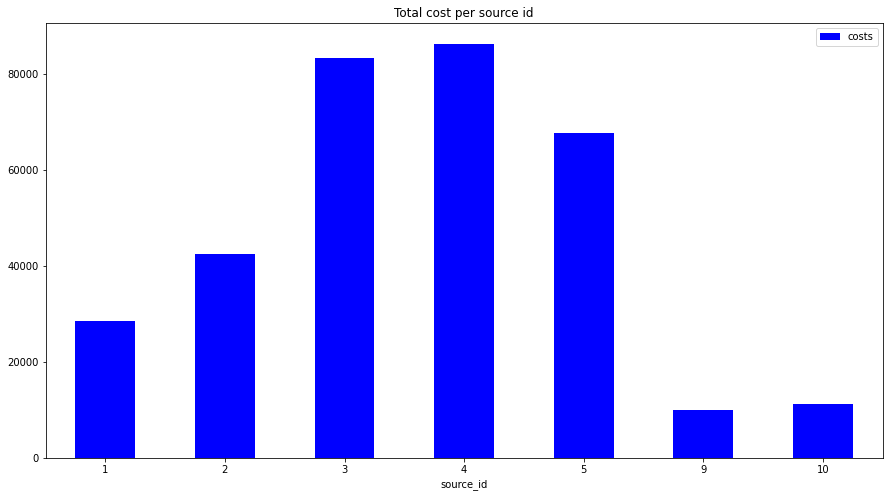

In [41]:
# group by source_id and calulate per each source id all his costs
costs_per_source = costs.groupby(['source_id'])['costs'].sum().reset_index()
display(costs_per_source)

# plot
costs_per_source.set_index('source_id',drop =True,inplace=True)
costs_per_source.plot.bar(rot=0,figsize=(15,8),title='Total cost per source id',color='blue')
plt.show()

costs over time

In [42]:
fig = px.line(costs, x="dt", y="costs", color='source_id')
fig.show()

**How much did customer acquisition from each of the sources cost**

In [43]:
# group by month for find the payment for each month
costs['pay_month'] = costs['dt'].astype('datetime64[M]')
cost_per_month=costs.groupby(['pay_month'])['costs'].sum().reset_index()

# check the first orders of those months
orders['first_order_month'] = orders['first_order_month'].astype(str)
orders['first_order_month'] = pd.to_datetime(orders['first_order_month']).astype('datetime64[M]')
buyers_per_first_time =orders.groupby(['first_order_month'])['uid'].nunique().reset_index()
buyers_per_first_time.columns=['pay_month','orders']
display(buyers_per_first_time.head())

,pay_month,orders
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [44]:
# Merge and show CAC per month
CAC_per_month=cost_per_month.merge(buyers_per_first_time ,how='left',on=['pay_month'])
CAC_per_month['CAC']=CAC_per_month['costs']/CAC_per_month['orders']
fig = px.line(CAC_per_month, x="pay_month", y="CAC", title='CAC per month',color_discrete_sequence=['purple'])
fig.show()

**CAC per source id**

In [45]:
# create a table for the first user entry source
first_sources=visits.sort_values('start ts').groupby('uid').first()['source id'].reset_index()
first_sources.columns=['uid','first_source']

# merge it with the orders table
orders =orders.merge(first_sources,on=['uid'],how='left')
display(orders.head())

,buy ts,revenue,uid,month,year,first_order_date,first_session,conversion,first_order_month,first_source
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06,2017,2017-06-01 00:10:00,2017-06-01,0,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06,2017,2017-06-01 00:25:00,2017-06-01,0,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06,2017,2017-06-01 00:27:00,2017-06-01,0,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06,2017,2017-06-01 00:29:00,2017-06-01,0,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06,2017,2017-06-01 07:58:00,2017-06-01,0,2017-06-01,3


In [46]:
# group costs sum by month and source id
costs_by_month_source= costs.groupby(['pay_month','source_id'])['costs'].sum().reset_index()

# merge
buyers_per_moth_source=orders.groupby(['first_order_month','first_source'])['uid'].nunique().reset_index()
buyers_per_moth_source.columns=['pay_month','source_id','buyers']

#cac calculations
CAC_per_month_source=costs_by_month_source.merge(buyers_per_moth_source,how='left',on=['pay_month','source_id'])
CAC_per_month_source['CAC']=CAC_per_month_source['costs']/CAC_per_month_source['buyers']
display(CAC_per_month_source.head())

,pay_month,source_id,costs,buyers,CAC
0,2017-06-01,1,1652.150024,190,8.695526
1,2017-06-01,2,2456.890137,235,10.454852
2,2017-06-01,3,4969.680176,638,7.789467
3,2017-06-01,4,4736.510254,413,11.468548
4,2017-06-01,5,3023.060059,384,7.872552


In [47]:
# ploting 
fig = px.line(CAC_per_month_source, x="pay_month", y="CAC",color='source_id',title='CAC per source id')
fig.show()

**Check how worthwhile where the investments (ROI)**

In [48]:
# roi = ltv/cac lets take this 2 information and calculate the ROI
CAC_per_month_ROI=CAC_per_month[['pay_month','CAC']]
CAC_per_month_ROI.columns=['first_order_month','CAC']

# convert to datetime 
ltv_cohort['first_order_month'] = ltv_cohort['first_order_month'].astype(str)
ltv_cohort['first_order_month'] = pd.to_datetime(ltv_cohort['first_order_month']).astype('datetime64[M]')


# merge
ROI = ltv_cohort.merge(CAC_per_month_ROI,on=['first_order_month'],how='left')
ROI.head()

,first_order_month,end_month,cohort_revenue,cohort_size,age,ltv,CAC
0,2017-06-01,2017-06,9557.490234,2023,0,4.724414,8.905091
1,2017-06-01,2017-07,981.820007,2023,1,0.485329,8.905091
2,2017-06-01,2017-08,885.340027,2023,2,0.437637,8.905091
3,2017-06-01,2017-09,1931.300049,2023,3,0.954671,8.905091
4,2017-06-01,2017-10,2068.580078,2023,4,1.022531,8.905091


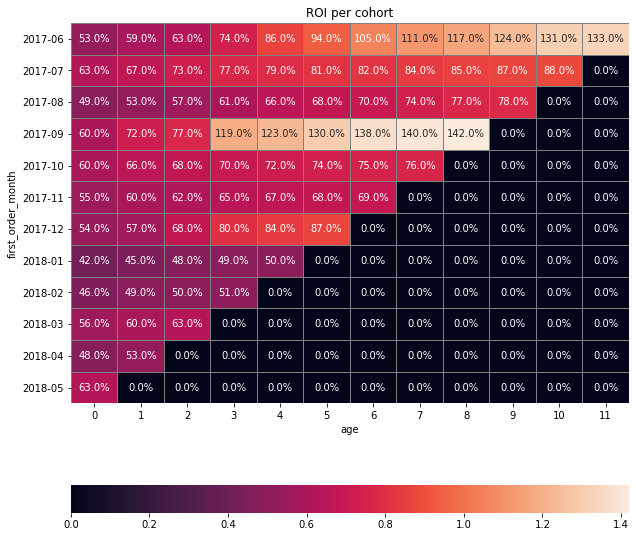

In [49]:
# Calculate the ROI and pivot the table
ROI['ROI']=ROI['ltv']/ROI['CAC']
ROI['first_order_month'] = ROI['first_order_month'].dt.to_period('M')
roi_piv = ROI.pivot_table(
    index='first_order_month', columns='age', values='ROI', aggfunc='mean'
).cumsum(axis=1).round(2)
roi_piv = roi_piv.fillna(0)

# plot the heat-map

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(roi_piv, annot=True, fmt='.1%', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='ROI per cohort')
plt.show()

In [50]:
ltv_per_source=orders.groupby(['first_source'])['uid','revenue'].agg({'uid':'nunique','revenue':'sum'}).reset_index()
ltv_per_source.columns=['source_id','buyers','revenue']
ltv_per_source['ltv']=ltv_per_source['revenue']/ltv_per_source['buyers']
display(ltv_per_source)

,source_id,buyers,revenue,ltv
0,1,2899,31090.550781,10.724578
1,2,3506,46923.609375,13.383802
2,3,10473,54511.238281,5.204931
3,4,10296,56696.832031,5.506685
4,5,6931,52624.019531,7.592558
5,7,1,1.220000,1.220000
6,9,1088,5759.399902,5.293566
7,10,1329,4450.330078,3.348631


In [51]:
roi_per_source=costs_per_source.merge(ltv_per_source,on=['source_id'])
roi_per_source['cac']=roi_per_source['costs']/roi_per_source['buyers']
roi_per_source['romi']=roi_per_source['ltv']/roi_per_source['cac']
fig = px.bar(roi_per_source, x='source_id', y='romi', title="romi per source id",color='source_id')
fig.update_xaxes(type='category')
fig.show()

#### Conclusions - Marketing

After calculations and ploting we get the following conclusions:
* The total market cost is 329131.62
* We can see that in any month the costs was higher than the revenues from the orders. the best ratrio between the revenue and the cost was in: December 2017, March 2018 and May 2018.
* The source id with largest costs were 3 and 4, when source id 9 was the smaller.
* The CAC per month had the largest value in July 2017 and January 2018 and was really small in September 2017 and May 2018.
* the CAC value of all the source id except source id number 9 and 2 was really stable. most of the source CAC start to decreased in may 2018.
* for the most of the cohort the ROI rate wasn't good - less than 1. but we can find some cases that that the roi is positive.
* The roi of the source id 1 and 2 are bigger than 1.

## Overall Conclusion 

After the analysis of the product, sales and marketing we can get the following conclusion about the current state of the company:
* Most of the user don't do more than one order - After the first order the company lose most of the users. There a problem with the order experience, we want to check how we can improve that the users will come back and do more orders.
* There's much more entry from the Desktop and his change rate his much more stable.
* There's always a lost - The costs are always bigger than the total revenues from the orders.
* The only source id that have roi value that are bigger than 1 are source id number 1 and number 2.

To improve the company profit and to set more revenues in the future we will sugest the following steps:
1. We see from the cohorts examinations that users that are in the system for long time usually make more orders. so in the markting plan the better way to make profit is invest to preserve the exsisting users instead from to search for new ones.
2. We figure out that most of the users use Desktop devices and the mean session are almost twice bigger than the mean session in touch devices. We will prefer to atract more users that use Desktop devices because the use in the touch devices are unreliable and we see the the daily disribution of those devices is really high, so invest on it will be a high risk.
3. In the marketing costs we will reccomand the company to invest on ad for source id number 1 and 2 because of the ROI value they had. and reduce the cost on other source id.